<a href="https://colab.research.google.com/github/codekennML/ExploratoryDataAnalysis/blob/main/EDA_Tips_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 


In [4]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips_df.shape

(244, 7)

In [6]:
tips_df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [26]:
#Checking for duplicate rows
filt =  tips_df.duplicated() == True
ter =  (tips_df['sex'] == 'Female')  & (tips_df['total_bill'] == 13.0)
tips_df.loc[ter]
#Observation : There is one duplicate row -  Row 198 and Row 202

,total_bill,tip,sex,smoker,day,time,size
198,13.0,2.0,Female,Yes,Thur,Lunch,2
202,13.0,2.0,Female,Yes,Thur,Lunch,2


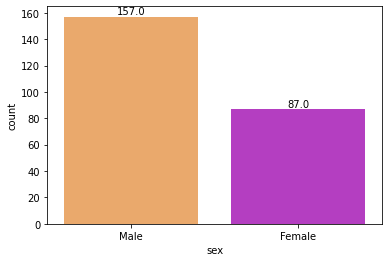

In [12]:
#Lets visualize the  genders distribution

fig, ax = plt.subplots(figsize=(6, 4))  
with sns.color_palette('gnuplot2_r' , n_colors= 3):
  p =  sns.countplot(x = tips_df.sex,  data =  tips_df)   
  for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()+0.1),  ha='center', va='bottom',
                      color= 'black')
    
#Observation - There were a total of 244 Respondents -  157 Male & 87 Female

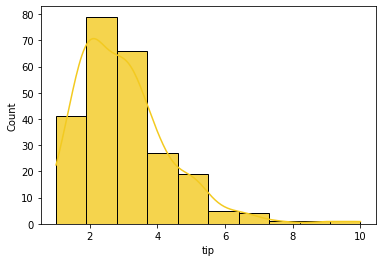

In [11]:
#Analyzing the tips distribution 
sns.histplot(data=tips_df, x="tip" ,kde = True,  color = '#f3ca20', alpha =  0.8,  bins  = 10)

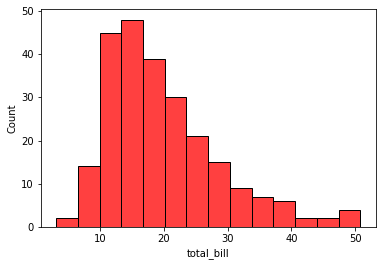

In [27]:
#Analyzing the total bill  distribution
sns.histplot(x =  tips_df.total_bill,  color =  {'red'})

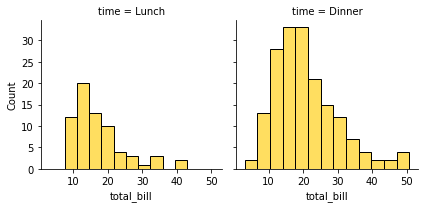

In [31]:
#Lets see how the bills and tips were split during meal times 
with sns.color_palette('gnuplot2_r', n_colors = 5):
  g = sns.FacetGrid(tips_df, col="time")
  g.map(sns.histplot, 'total_bill')

#Observation  : More Food / Drinks were sold during dinner than lunch 


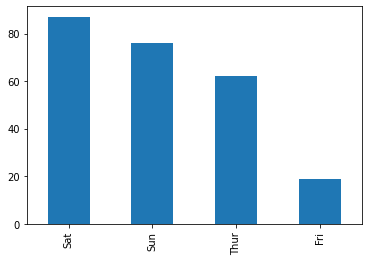

In [7]:
#Analyze the days of the weeks for which the most tips were received based on number of tips received 

tips_df['day'].value_counts().plot.bar()
#Observation : 
#The most tips were received on Saturdays with a cumulative sum of over 80 tips and the least number of tips were received on Fridays with a little less than 20 tips 
#The least tips were received on Fridays, strange!


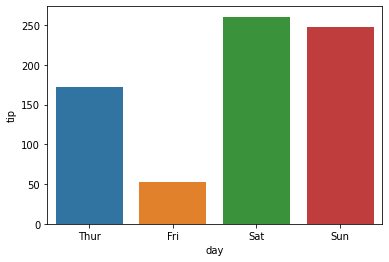

In [9]:
#Analyzing tips based on total tips  received on respective days 
tips  =  tips_df.groupby(by =['day'])['tip'].sum().reset_index()
sns.barplot(x = tips.day , y  = tips.tip,  data =  tips )

#Observation -  Saturdays had the highest amount of tips received in terms of amount which is almost 5x the amount received on Fridays  

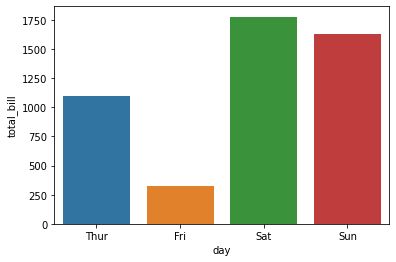

In [10]:
#Analyzing the total bills based on days 

day_bill =  tips_df.groupby(by = ['day'])['total_bill'].sum()
df  =  day_bill.reset_index()
sns.barplot(x =  df.day , y  =  df.total_bill,  data =  df  )
#Observation -  Saturdays had the cumulative sum of bills  received in terms of amount and is  9x the amount received on Fridays  

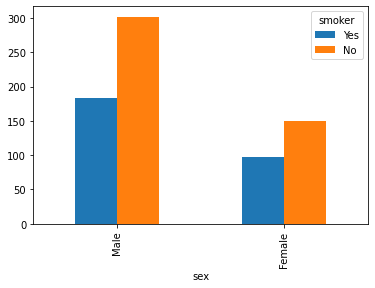

In [13]:
#Seperate tips donors based on gender and smoking 

tips_df.groupby(['sex','smoker' ])['tip'].sum().unstack().plot.bar()
#Observation :
# Non-smokers tend to give more tips than smokers  irrespective of gender 
# Male smokers give more tips than female smokers 
# Female non-smokers give approx. half the amount of tips from their male counterparts

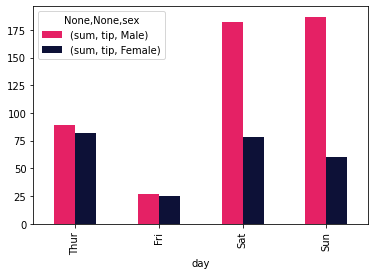

In [14]:
#Compare tips given by genders on differnt days 
pd.pivot_table(tips_df, index =  ['day', 'sex'], values =  ['tip'], aggfunc=[np.sum]).unstack().plot.bar(color =  {'#e52165', '#0d1137'})

#Observations: 
#Male Customers tend to give more tips and the highest amount of male customer tips were given on Sundays
#Highest amount of female tips were given on Thursdays -  Interesting!

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

<Figure size 432x288 with 0 Axes>

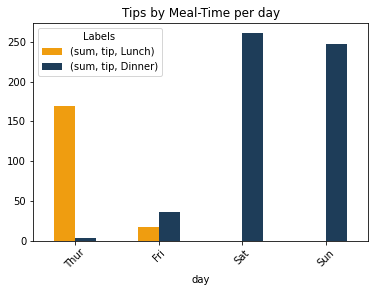

In [21]:
#Analyze the sum of tips received during meal time on respective days 
fig =  plt.figure(figsize = (6,4))
pd.pivot_table(tips_df, index =  ['day', 'time'], values =  ['tip'], aggfunc=[np.sum]).unstack().plot.bar(color =  {'#ef9d10', '#1e3d59'})
plt.legend(title = 'Labels ')
plt.title('Tips by Meal-Time per day')
plt.xticks (rotation = 45 )
plt.show()

#Observation : 
# Zero tips were received at lunch times on saturdays and sundays 
# Lunch tips are significantly higher on thursdays but dinner tips are significantly lower than most days




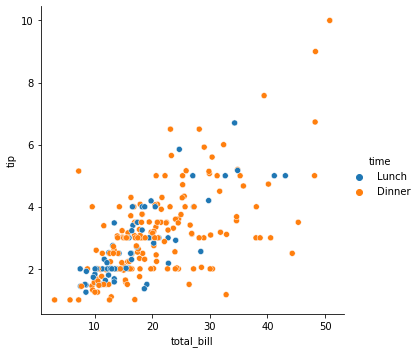

In [18]:
#Distribution of total bills and tips given based on meal time 

sns.relplot(x= tips_df.total_bill, hue =  tips_df.time,  y =tips_df.tip,  data =  tips_df )

#Observation : Lunch time tips were distributed around $1-$6 